
## Chapter 2 [Diffraction](Ch3-_Diffraction.ipynb)


<hr style="height:1px;border-top:4px solid #FF8200" />

# Kinematic Scattering Geometry

part of 

## [Analysis of Transmission Electron Microscope Data](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)



by Gerd Duscher, 2019

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Import numerial and plotting python packages

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook

# 3D plotting package used
from mpl_toolkits.mplot3d import Axes3D # 3D plotting 

# additional package 
import  itertools 
import scipy.constants as const

# Import libraries from the book
import pyTEMlib
import pyTEMlib.KinsCat as ks         # Kinematic sCattering Library
                             # Atomic form factors from Kirklands book



Populating the interactive namespace from numpy and matplotlib
Using KinsCat library version  0.5  by G.Duscher
spglib not installed; Symmetry functions of spglib disabled
windows



## Define silicon crystal

In [5]:
#Initialize the dictionary with all the input
tags = ks.structure_by_name('Silicon')

print(tags['elements'])
print(tags['base'])

['Si']
['Si', 'Si', 'Si', 'Si', 'Si', 'Si', 'Si', 'Si']
[(0.0, 0.0, 0.0), (0.5, 0.0, 0.5), (0.5, 0.5, 0.0), (0.0, 0.5, 0.5), [0.25, 0.25, 0.25], [0.75, 0.25, 0.75], [0.75, 0.75, 0.25], [0.25, 0.75, 0.75]]


## Wavelength and Magnitude of Incident Wavevector

In [14]:
acceleration_voltage_V = 20.0 *1000.0 #V

wave_length_nm  = ks.get_waveLength(acceleration_voltage_V)

print('The wavelength for {0:.1f}kV is : {1:.5f}pm'.format(acceleration_voltage_V/1000.,wave_length_nm*1000.))

wave_vector_magnitude = 1/wave_length_nm
K0 = wave_vector_magnitude

print('The magnitude of the incident wavevector is {0:.1f} 1/nm'.format(K0) )



The wavelength for 20.0kV is : 8.58851pm
The magnitude of the incident wavevector is 116.4 1/nm


## Reciprocal Lattice and Incident Wavevector

In [7]:
zone = [0,0,1] #Parallel to z-axis for simplicity

#Reciprocal Lattice 
# We use the linear algebra package of numpy to invert the unit_cell "matrix"
reciprocal_lattice = np.linalg.inv(tags['unit_cell']).T # transposed of inverted unit_cell

print('reciprocal lattice\n',reciprocal_lattice)

#Incident wavevector in vacuum 
# zone axis in global coordinate system
zone_vector = np.dot(zone,reciprocal_lattice)
K0_unit_vector = zone_vector/ np.linalg.norm(zone_vector) # incident unit wave vector 
K0_vector =K0_unit_vector*K0 

print('Incident wavevector: ',K0_vector,' in units of [1/nm]')

reciprocal lattice
 [[1.764271 0.       0.      ]
 [0.       1.764271 0.      ]
 [0.       0.       1.764271]]
Incident wavevector:  [  0.          0.        398.7345709]  in units of [1/nm]


# 2D Plot of Unit Cell in Reciprocal Space

<IPython.core.display.Javascript object>


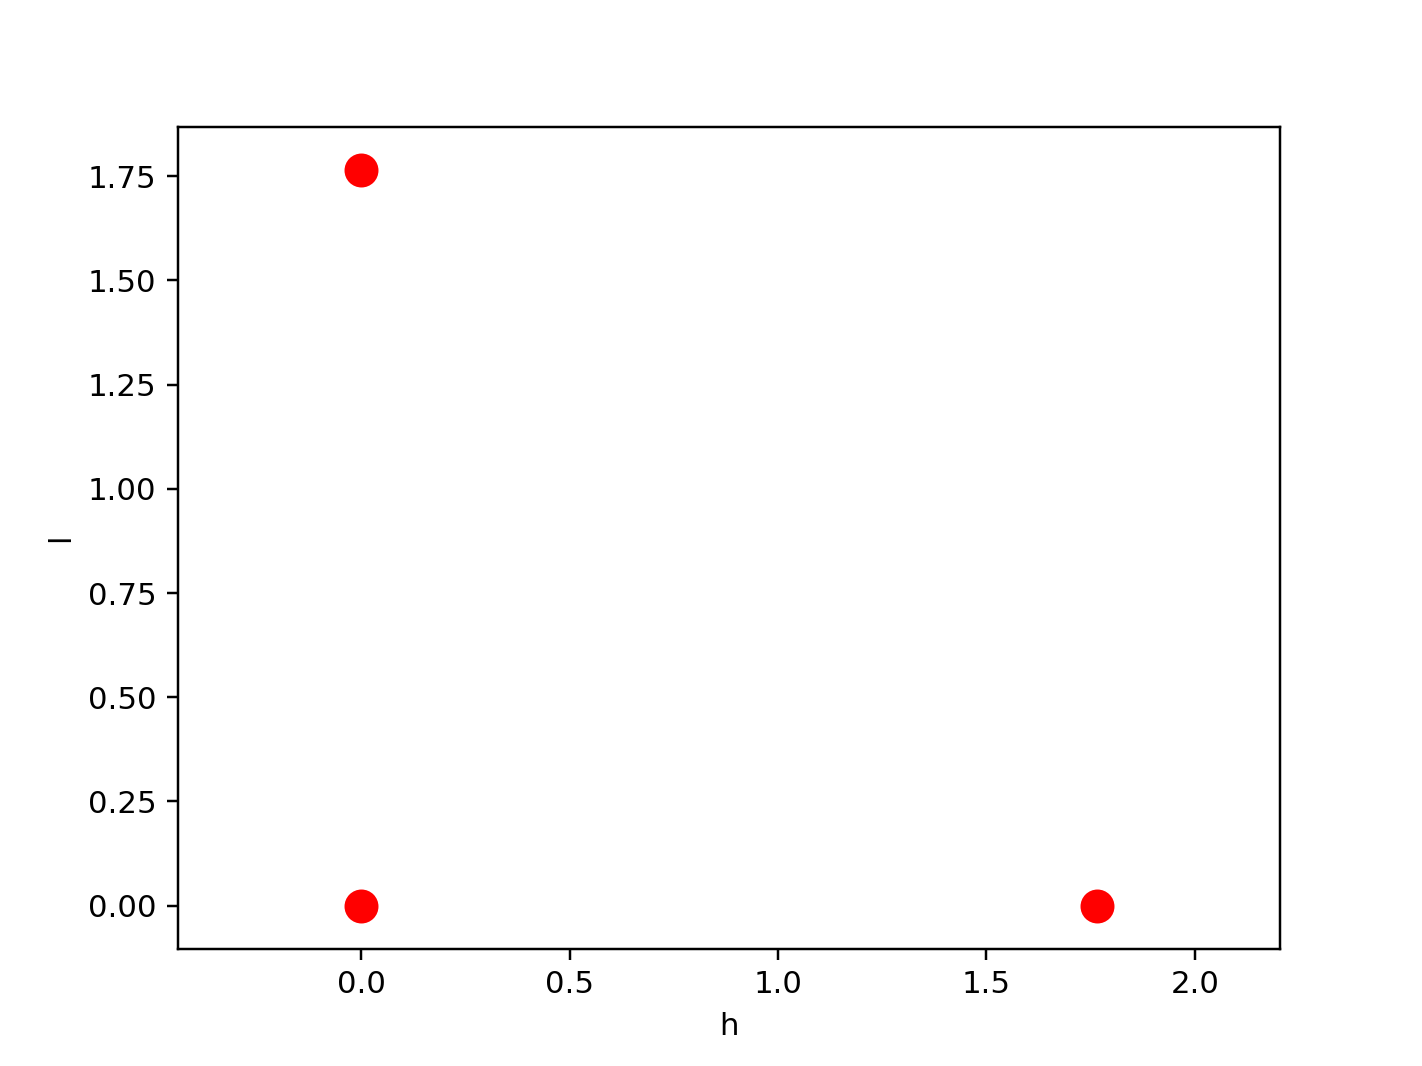

(-0.09930225946638538,
 1.8635732552457058,
 -0.10309450216991839,
 1.867365497949239)

In [8]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(reciprocal_lattice[:,0], reciprocal_lattice[:,2], c='red', s=100)
plt.xlabel('h')
plt.ylabel('l')
ax.axis('equal')

# 2D plot of Reciprocal Lattice

<IPython.core.display.Javascript object>


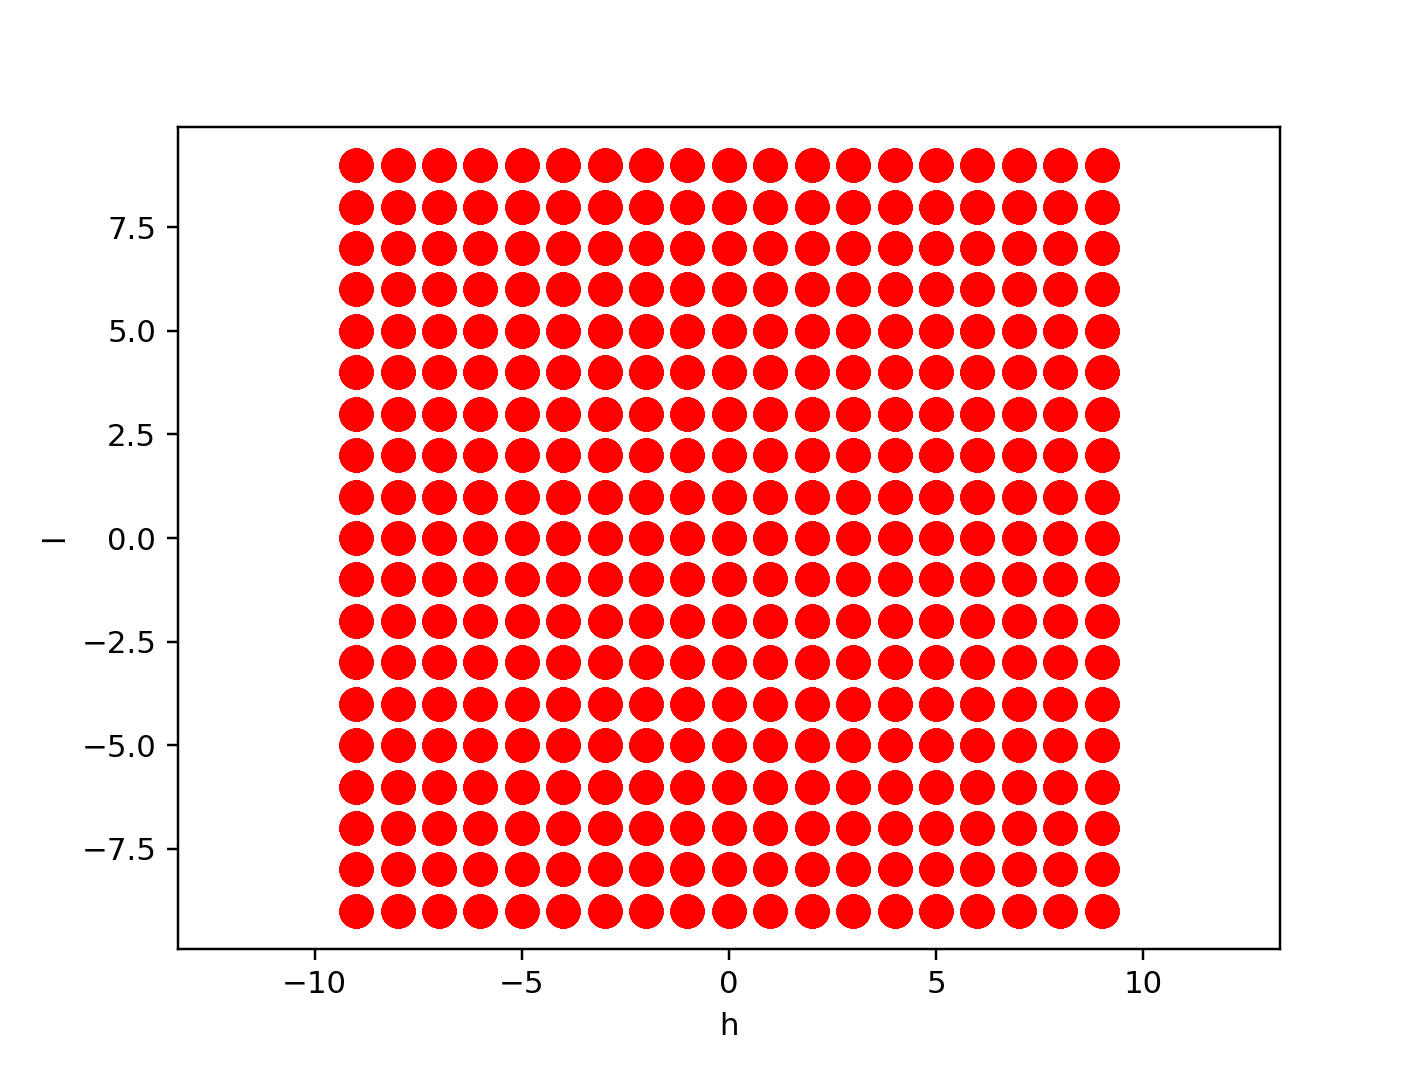

(-9.911088709677419, 9.911088709677419, -9.914880952380951, 9.914880952380953)

In [9]:
hkl_max = 9
h  = np.linspace(-hkl_max,hkl_max,2*hkl_max+1)  # all evaluated single Miller Indices
hkl  = np.array(list(itertools.product(h,h,h) )) # all evaluated Miller indices

# Plot 2D
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(hkl[:,0], hkl[:,2], c='red', s=100)
plt.xlabel('h')
plt.ylabel('l')
ax.axis('equal')

# 2D Plot of Reciprocal Lattice
We really do not need that many reflections in the z-direction, so we reduce those.

(2116, 3)
1.7642709957793206


<IPython.core.display.Javascript object>


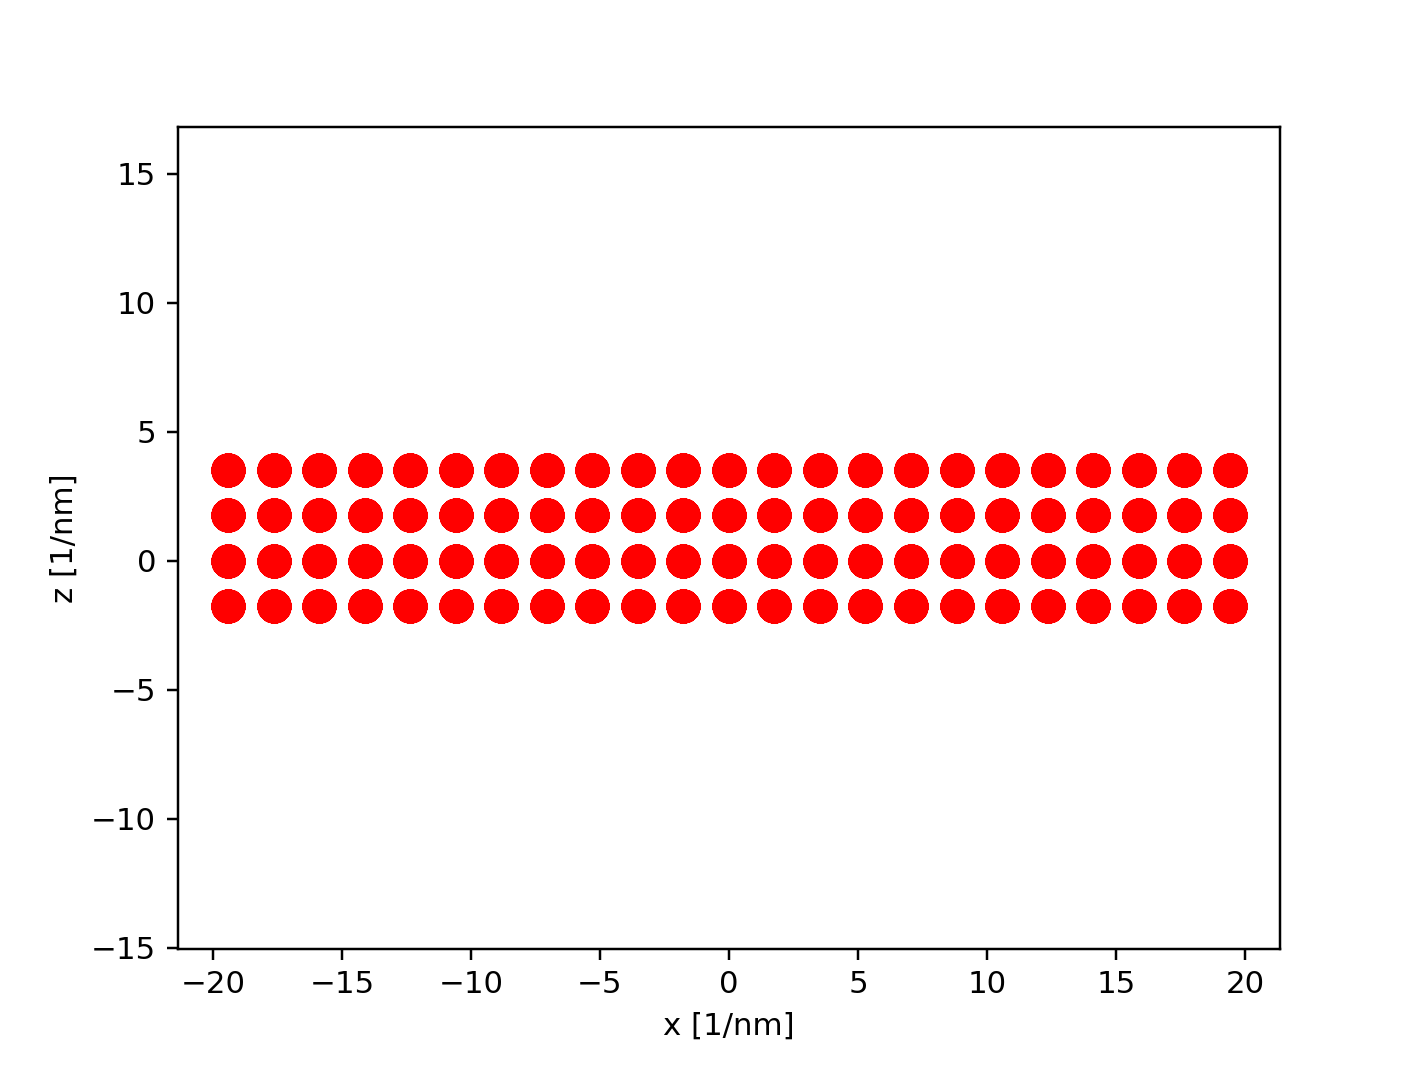

Text(0, 0.5, 'z [1/nm]')

In [10]:
hkl_max = 11
h  = np.linspace(-hkl_max, hkl_max, 2*hkl_max+1)  # all evaluated single Miller Indices
l =  np.linspace(-1,2,4)  # all evaluated single Miller Indices 
hkl  = np.array(list(itertools.product(h,h,l) )) # all evaluated Miller indices

g = np.dot(hkl, reciprocal_lattice) # all evaluated reciprocal lattice points
print(hkl.shape)
print(g[122,2])

# Plot 2D
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(g[:,0], g[:,2], c='red', s=100)
ax.axis('equal')
plt.xlabel('x [1/nm]')
plt.ylabel('z [1/nm]') 

# 2D Plot of Reciprocal Lattice with Ewald Sphere

Please zoom in to the reciprocal lattice once you did the calculation

<IPython.core.display.Javascript object>


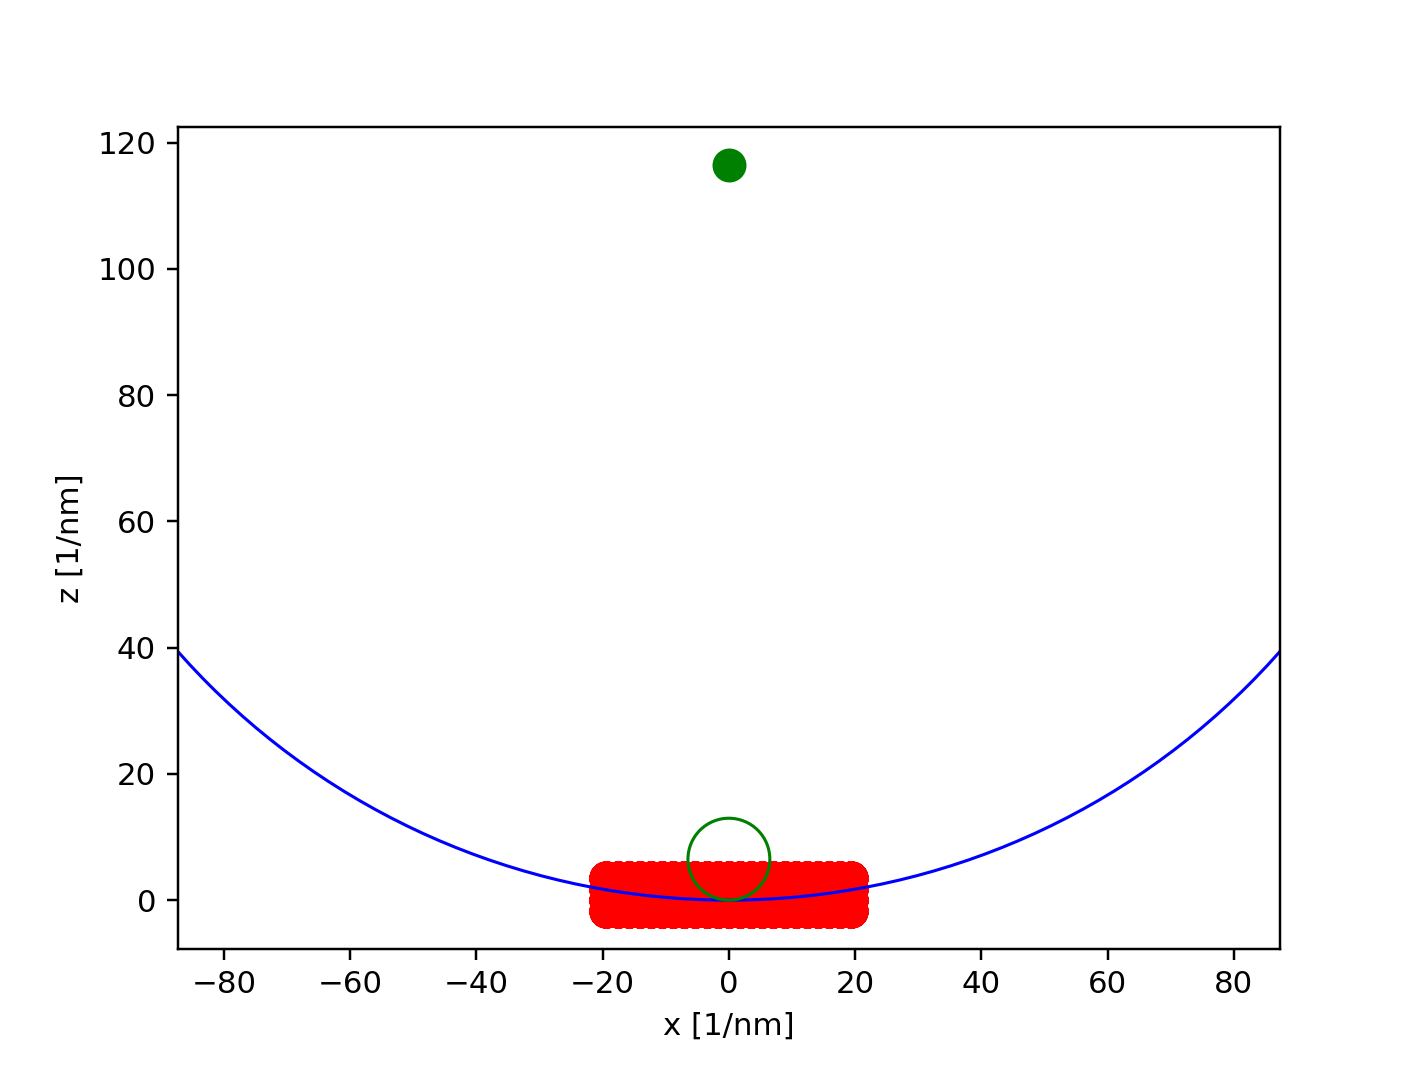

116.43460739869234


In [16]:
Ewald_Sphere = plt.Circle((0, K0), K0, color='b', fill=False)
Ewald_Sphere_CuKa = plt.Circle((0, 1./0.15418), 1./0.15418, color='g', fill=False)

# Plot 2D
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(g[:,0], g[:,2], c='red',s=100)
ax.scatter(0, K0, c='green',s=100)

ax.add_artist(Ewald_Sphere)
ax.add_artist(Ewald_Sphere_CuKa)

ax.axis('equal')
plt.xlabel('x [1/nm]')
plt.ylabel('z [1/nm]')


# 2D Plot of Reciprocal Lattice with Excitation Error

Here we define the excitation error.
With the wave vector coming in parallel to a zone axis, the Ewald sphere should not cut any point in reciprocal space.
That is why we do $\theta - 2\theta$ scans in X-ray diffraction experiments.

Hwever the dimensions of a TEM specimen are rather small, for a minimum the thickness paralllel to the beam has to be in the nanometer range (<200nm). This leads to the effect that the reciprocal lattice spots now are 3 dimensional objects refleting the specimen geometry in reciprocal space. The spots are theFourier transfrom of the specimen geometry. A normal specimen is a thin disk perpendicular to the beam and in reciprocal space it is a thin rod parallel to the wave vector.

Therefore we can excite Bragg reflections even though we not exactly cut the reflection spot with the Ewald sphere. Theis deviation is called excitation error and is expressed as a vector.


2116
[17.64270996 10.58562597  0.        ]


<IPython.core.display.Javascript object>


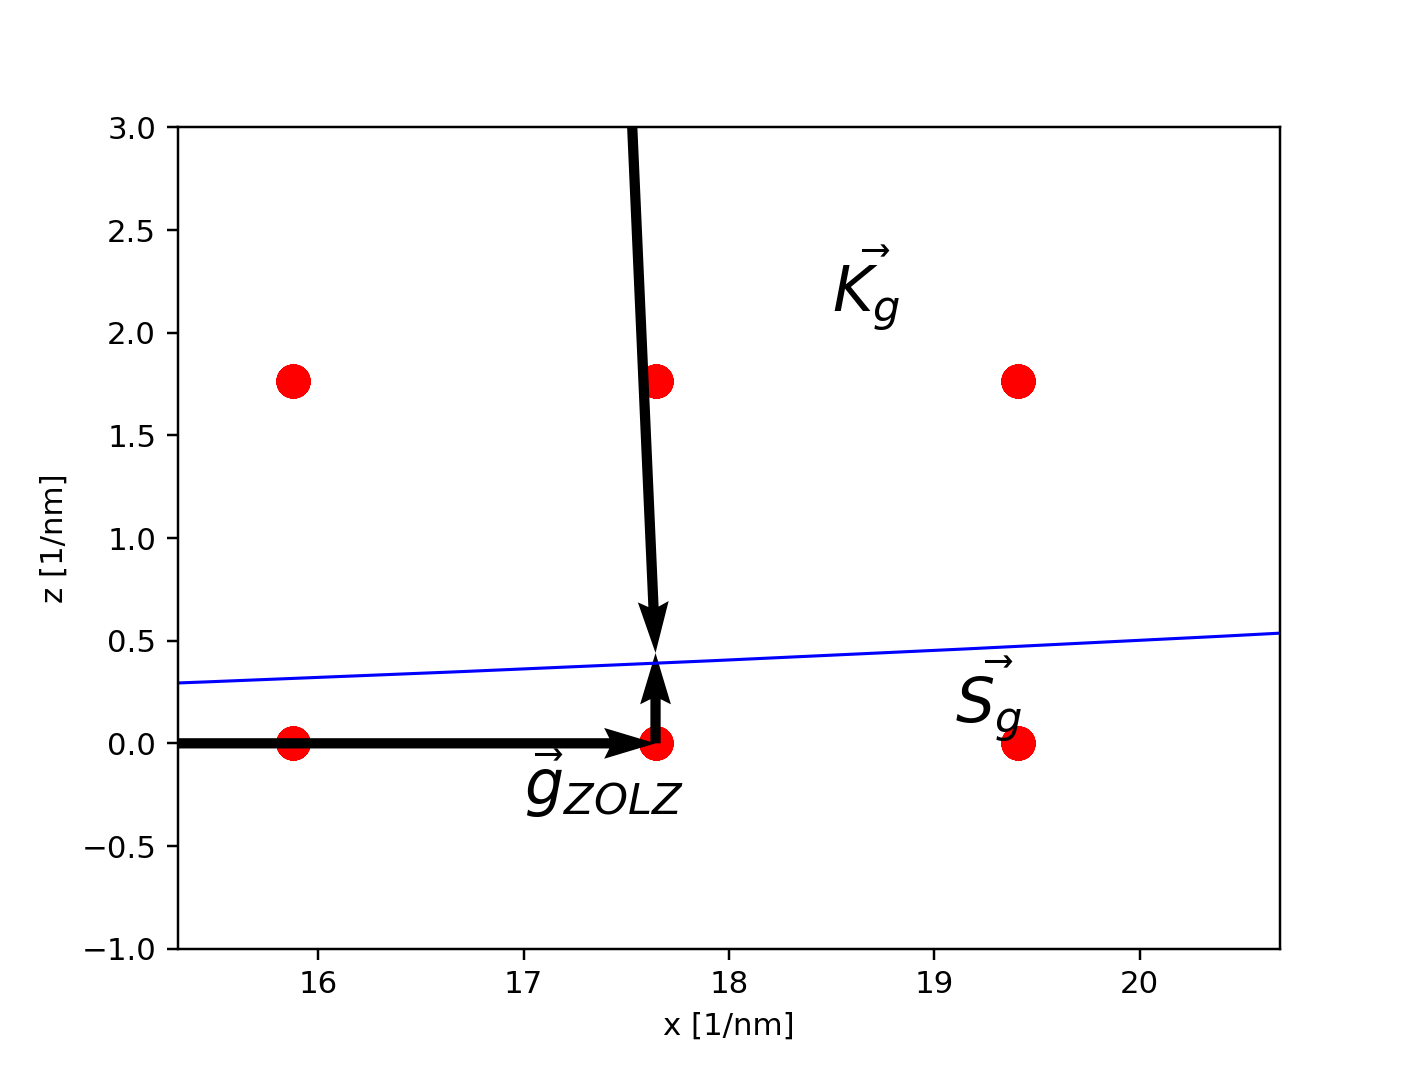

(-1, 3)

In [12]:
Ewald_Sphere = plt.Circle((0, K0), K0, color='b', fill=False)
print(len(g))
print(g[2001,:])
# Plot 2D
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(g[:,0], g[:,2], c='red',s=100)
ax.scatter(0, K0, c='green',s=100)

ax.add_artist(Ewald_Sphere)

ax.quiver([0,0,0,g[2001,0]],[K0,K0,0,0],[0,g[2001,0],g[2001,0],0],[-K0, -K0+0.44,0,0.44], units='xy', scale =1, width = .05)

plt.text(19.1,.1,r'$\vec{S_g}$', size=20)
plt.text(17,-.3,r'$\vec{g}_{ZOLZ}$', size=20)
plt.text(18.5,2.1,r'$\vec{K_g}$', size=20)
plt.text(.1,10,r'$\vec{K_0}$', size=20)


ax.axis('equal')
plt.xlabel('x [1/nm]')
plt.ylabel('z [1/nm]')
plt.xlim(16,20)
plt.ylim(-1,3)

# 2D Plot of Reciprocal Lattice with Excitation Error
The same plot as above but a little zoomed out will show also the incident wave vector.

<IPython.core.display.Javascript object>


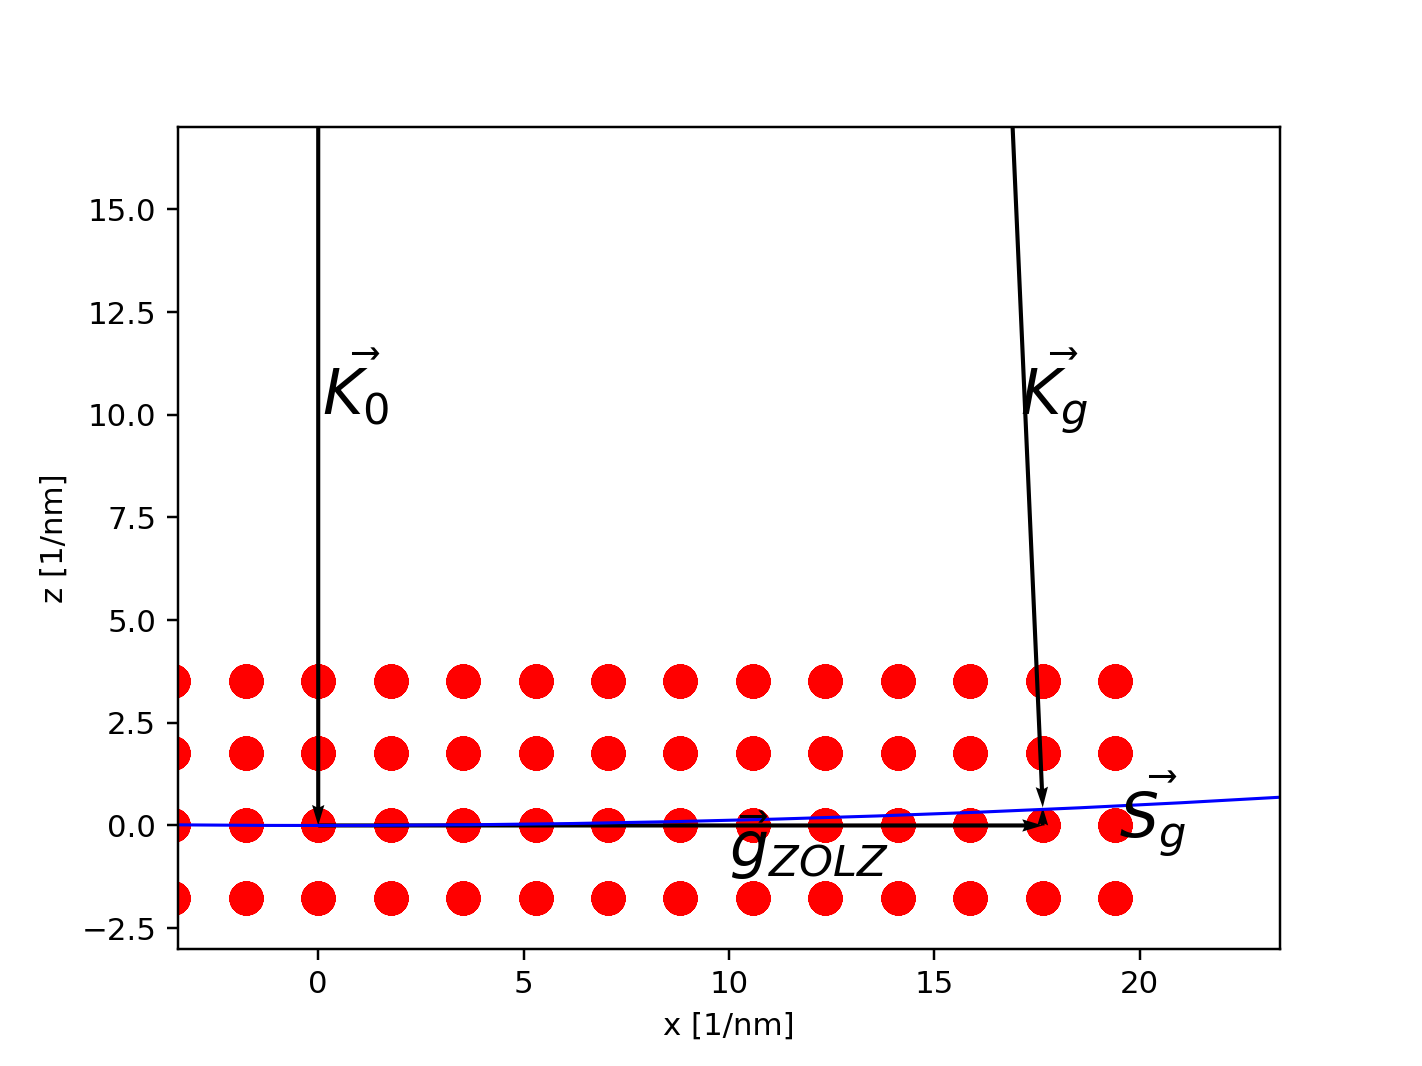

(-3, 17)

In [13]:
Ewald_Sphere = plt.Circle((0, K0), K0, color='b', fill=False)

# Plot 2D
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(g[:,0], g[:,2], c='red',s=100)
ax.scatter(0, K0, c='green',s=100)

ax.add_artist(Ewald_Sphere)
ax.quiver([0,0,0,g[2001,0]],[K0,K0,0,0],[0,g[2001,0],g[2001,0],0],[-K0, -K0+0.44,0,0.44], units='xy', scale =1, width = .1)

plt.text(19.5,-.3,r'$\vec{S_g}$', size=20)
plt.text(10,-1,r'$\vec{g}_{ZOLZ}$', size=20)
plt.text(17.1,10,r'$\vec{K_g}$', size=20)
plt.text(.1,10,r'$\vec{K_0}$', size=20)


ax.axis('equal')
plt.xlabel('x [1/nm]')
plt.ylabel('z [1/nm]')
plt.xlim(0,20)
plt.ylim(-3,17)

## Center of Ewald Shere
So far we have considered the incident wave vector to be parallel to the Z-axis. 
However, we need to know the center of the Ewald sphere for any zone axis.


In [19]:
# INPUT
zone_hkl = np.array([1,1,0])

U0 = 0
for i in range(len(tags['elements'])):
    a = tags['elements'][i]
    U0 += ks.feq(a,0)*0.023933754

volume =  np.linalg.det(tags['unit_cell'])*1000. # Needs to be in Angstrom for form factors
AngstromConversion = 1.0e10 # So [1A (in m)] * AngstromConversion = 1
NanometerConversion = 1.0e9 

ScattFacToVolts=(const.h**2)*(AngstromConversion**2)/(2*np.pi*const.m_e*const.e)*volume
U0=U0*ScattFacToVolts
print('The inner potential is {0:.1f}kV'.format(U0/1000))

incident_wave_vector_vacuum = 1/wave_length_nm
K0 = incident_wave_vector = np.sqrt(1/wave_length_nm**2 + U0 )#1/nm

cent = np.dot(zone_hkl,reciprocal_lattice)
cent = cent /np.linalg.norm(cent)* incident_wave_vector
 
normal = zone_hkl/ np.linalg.norm(zone_hkl)
print('Center of Ewald sphere ',cent)

The inner potential is 9.7kV
Center of Ewald sphere  [107.84914551 107.84914551   0.        ]


## Possible Reflections
must be within the excitation error to the Ewald sphere.

Find all Miller indices whose reciprocal point lays near the Ewald sphere with radius $K_0$  within a maximum excitation error $S_g$

with $S_g \approx (K_0^2 -|\vec{K_0}+\vec{g}|^2)/ 2K_0$

First we produce all Miller indices up to a maximum value of "hkl_max" and then we check whether they fullfil above condition.

Please change "hkl_max" and the maximum excitation error "Sg_max" and see what happens.

In [20]:
# INPUT 
hkl_max = 25#  maximum allowed Miller index
Sg_max = .3 # 1/nm  maximum allowed excitation error

h  = np.linspace(-hkl_max,hkl_max,2*hkl_max+1)   # all evaluated single Miller Indices
hkl  = np.array(list(itertools.product(h,h,h) )) # all evaluated Miller indices
g = np.dot(hkl,reciprocal_lattice)               # all evaluated reciprocal lattice points

# Calculate exitation errors for all reciprocal lattice points
S = []
for i  in range(len(g)):
    ## Zuo and Spence, 'Adv TEM', 2017 -- Eq 3:14
    S.append(float((K0**2-np.linalg.norm(g[i] - cent)**2)/(2*K0)))
S = np.array(S)

# Determine reciprocal lattice points with excitation error less than the maximum allowed one: Sg_max
reflections = abs(S)< Sg_max

Sg = S[reflections]
g_hkl =g[reflections]
print(g_hkl.shape)
hkl = hkl[reflections]
 
print ('Of the {0} tested reciprocal lattice points, {1} have an excitation error less than {2:.2f} 1/nm'.format( len(g) , len(g_hkl), Sg_max))

(1053, 3)
Of the 132651 tested reciprocal lattice points, 1053 have an excitation error less than 0.30 1/nm


## Conclusion

The scattering geometry provides all the tools to determine which reciprocal lattice points are possible and which of them are allowed.



## Back: [Analyzing Ring Diffraction Pattern](CH2-Diffraction-Rings.ipynb)
## Next: [Plotting of Diffraction Pattern](CH2-Plotting_Diffraction_Pattern.ipynb)
## Chapter 2: [Diffraction](CH2-_Diffraction.ipynb)
## List of Content: [Front](_Analysis_of_Transmission_Electron_Microscope_Data.ipynb)
